## Meeting w Ovidiu 11/7

### Agenda today
1. Status
2. Discuss model outputs :)

### 1. Status

**Since last time:**
* Implemented K-Fold CV
* Implemented Hyperparameter tuning
* Started building prediction pipeline w CMIP6 models
* Fixed a lot of bugs and moved codebase to new repo and laptop..

**Ongoing:**
* Iterate on model(s) 
* Finish up first prediction pipeline w CMIP6
* Make draft UI for prediction output
* Calculate economic losses

### 2. Model
Simple neural network with 2 hidden layers:
* Target: Winter wheat
* L1: 50 units, L2: 10 hidden units
* Trained for 200 epochs - converged in 77 to 10e-4 loss
* Trained on Batch MSE with ADAM


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import sys
sys.path.append('..')
import src.utils as ut
import src.maps as mp


C:\Users\Andreas Langholz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
path = "C:\\Users\\Andreas Langholz\\Yieldcaster\\data\\outputs\\hist_errors\\"
df_modelloss = pd.read_csv(path + "model2_loss.csv", index_col = 0)
df_res_train = pd.read_csv(path + "model2err_train.csv", index_col = 0)
df_res_test = pd.read_csv(path + "model2err_test.csv", index_col = 0)

In [52]:
df_modelloss.describe()

Epoch:        loss  train_rmse  test_rmse
count  77.000000   77.000000   77.000000  77.000000
mean   39.000000   25.537789    4.312492   4.366158
std    22.371857   52.295223    3.033579   2.985169
min     1.000000    5.333890    2.666461   2.753178
25%    20.000000    6.469510    2.777680   2.860496
50%    39.000000    6.673780    2.837526   2.922253
75%    58.000000    7.989916    3.675836   3.718300
max    77.000000  304.081970   16.704852  16.489739

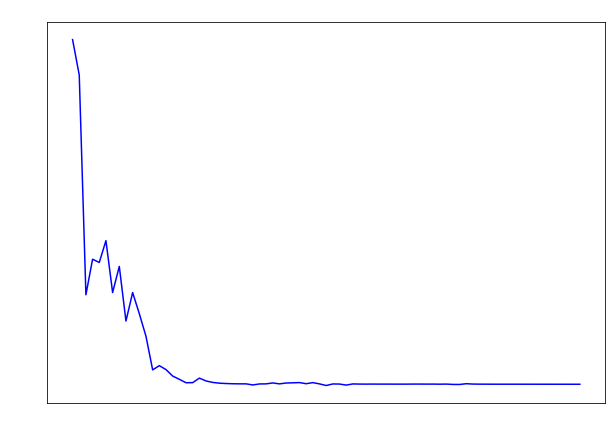

In [53]:
fig = plt.figure(figsize=(10, 7))
ax  = fig.add_subplot(1, 1, 1)
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
ax.yaxis.label.set_color('white')
ax.xaxis.label.set_color('white')
ax.title.set_color('white')
plt.xlabel("Epochs")  # add X-axis label
plt.ylabel("Model loss values")  # add Y-axis label
plt.title("Model avg MSE")  # add title

plt.plot(df_modelloss['Epoch:'], df_modelloss['loss'], color = 'blue')
plt.show()

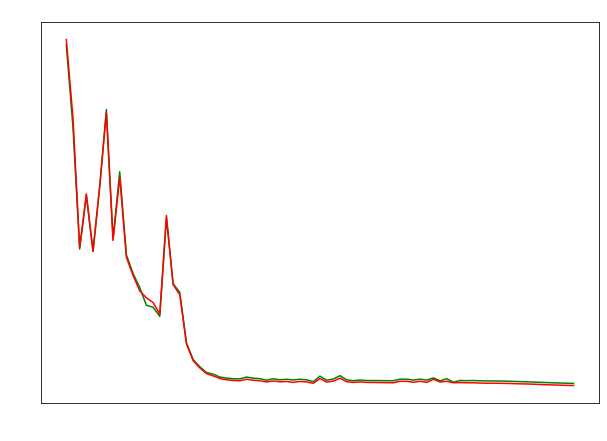

In [15]:
fig = plt.figure(figsize=(10, 7))
ax  = fig.add_subplot(1, 1, 1)
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
ax.yaxis.label.set_color('white')
ax.xaxis.label.set_color('white')
ax.title.set_color('white')
plt.xlabel("Epochs")  # add X-axis label
plt.ylabel("Model loss values")  # add Y-axis label
plt.title("Model RMSE train/test")  # add title

# plt.plot(df_modelloss['Epoch:'], df_modelloss['loss'], color = 'blue')
plt.plot(df_modelloss['Epoch:'], df_modelloss['test_rmse'], color = 'green')
plt.plot(df_modelloss['Epoch:'], df_modelloss['train_rmse'], color = 'red')

plt.show()

In [29]:
df_res_test.describe()

lon           lat          year         yield    model_pred  \
count  28160.000000  28160.000000  28160.000000  28160.000000  28160.000000   
mean     -11.297638     24.052006   1997.912891      3.322540      3.153555   
std       74.549667     27.268787      9.613951      2.885532      0.585019   
min     -122.250000    -52.250000   1981.000000      0.000000      2.898952   
25%      -84.250000     20.250000   1990.000000      1.129587      2.898952   
50%        0.250000     35.250000   1998.000000      2.509021      2.898952   
75%       39.250000     41.750000   2006.000000      4.758115      2.898952   
max      143.750000     57.750000   2015.000000     16.655502      9.812687   

          linr_pred  rolling_yield3        errors  
count  28160.000000    28160.000000  28160.000000  
mean       3.397635        3.327397      0.271479  
std        1.838481        2.856241      0.319800  
min       -1.550993        0.000000      0.000000  
25%        2.039639        1.151022      0.064335  
50%        3.278697        2.512014      0.175340  
75%        4.786608        4.724475      0.363224  
max       10.437741       15.790882     10.726490

In [34]:
df_res_train.describe()

lon            lat           year          yield  \
count  255269.000000  255269.000000  255269.000000  255269.000000   
mean      -16.001542      23.958241    1997.952783       3.338997   
std        73.449624      27.540265       9.628656       2.803074   
min      -123.750000     -54.250000    1981.000000       0.000000   
25%       -87.250000      20.250000    1990.000000       1.132701   
50%        -3.250000      35.250000    1998.000000       2.604359   
75%        37.750000      42.250000    2006.000000       4.887985   
max       144.250000      58.250000    2015.000000      17.268173   

          model_pred      linr_pred  rolling_yield3         errors  
count  255269.000000  255269.000000   255269.000000  255269.000000  
mean        3.178139       3.337848        3.343247       0.273593  
std         0.635342       1.836488        2.770449       0.330440  
min         2.898952      -2.212118        0.000000       0.000000  
25%         2.898952       1.966065        1.157993       0.067641  
50%         2.898952       3.210429        2.620928       0.178123  
75%         3.096494       4.754828        4.879617       0.367709  
max        11.646482      11.524636       16.345912      13.811485

In [35]:
df_res_test.sort_values('errors').tail()


lon    lat  year      yield  model_pred  linr_pred  rolling_yield3  \
25558  97.75  17.75  1992  13.836935    2.898952   4.128130        9.478361   
4071  -99.25  21.75  2015   8.818175    5.633902   6.622138       13.187837   
20568  34.25   9.75  2006  11.640706    2.898952   3.173818        7.081052   
20312  32.75 -20.25  1994   7.014484    2.898952   1.919756       12.762161   
19666  30.25 -20.75  1981  15.636000    2.898952   1.552457        4.909510   

          errors  
25558   4.358574  
4071    4.369662  
20568   4.559654  
20312   5.747677  
19666  10.726490

In [36]:
df_res_train.sort_values('errors').tail()

lon    lat  year      yield  model_pred  linr_pred  rolling_yield3  \
175835  28.75 -20.75  1981  15.636000    2.898952   1.359493        3.355146   
180473  30.75 -21.75  1981  15.636000    2.898952   0.498540        3.273166   
177278  29.25 -20.25  1981  15.636000    2.898952   2.104703        2.720285   
168881  26.25 -18.25  1981  15.635999    2.898952   2.485981        2.141004   
177243  29.25 -20.75  1981  15.636000    2.898952   1.330299        1.824515   

           errors  
175835  12.280854  
180473  12.362834  
177278  12.915715  
168881  13.494995  
177243  13.811485

In [54]:
year = 1995
df_res_test_map = ut.subset(df_res_test, False, year)
df_res_train_map = ut.subset(df_res_train, False, year)

In [55]:
mp.make_map(df_res_test_map, 'errors', 'Test set errors', 'Dif. actual to predicted yield')

In [46]:
mp.make_map(df_res_train_map, 'errors', 'Training set errors', 'Dif. actual to predicted yield')

In [47]:
model_test_rmse = ut.rmse(df_res_test['yield'], df_res_test['model_pred'])
linr_test_rmse = ut.rmse(df_res_test['yield'], df_res_test['linr_pred'])
rolling_avg_rmse = ut.rmse(df_res_test['yield'], df_res_test['rolling_yield3'])
model_train_rmse = ut.rmse(df_res_train['yield'], df_res_train['model_pred'])
linr_train_rmse = ut.rmse(df_res_train['yield'], df_res_train['linr_pred'])
rolling_avg_train_rmse = ut.rmse(df_res_train['yield'], df_res_train['rolling_yield3'])

In [48]:
print('Model test set RMSE: {}'.format(round(model_test_rmse,4)))
print('Linreg test set RMSE: {}'.format(round(linr_test_rmse,4)))
print('Rolling avg 3-year test set RMSE: {}'.format(round(rolling_avg_rmse,4)))

Model test set RMSE: 2.7403
Linreg test set RMSE: 2.2275
Model test set RMSE: 0.4195


In [50]:
print('Model train set RMSE: {}'.format(round(model_train_rmse,4)))
print('Linreg train set RMSE: {}'.format(round(linr_train_rmse,4)))
print('Rolling avg 3-year train set RMSE: {}'.format(round(rolling_avg_train_rmse,4)))

Model train set RMSE: 2.6587
Linreg train set RMSE: 2.1142
Rolling avg 3-year train set RMSE: 0.429


### Things to try:
* Get rid of wierd years (1981, maybe 2016) - Check up GDHY paper
* More data (altitude, irrigation..)
* Bigger model / different architecture (RNNs etc. )
